# What is good food? 

## 🍇 Background
For many of us, our knowledge about nutrition comes from mainstream and social media. I decided to take a deep dive into nutrition data to see what the numbers can tell us about nutrition.

## 🍈 Data Overview

The nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
food = pd.read_csv('nutrition.csv')
food

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


## 🥑 Challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## 🍍 Executive Summary
**Purpose:** In this analysis, we aim to examine a database of food items with their respective nutritional compositions to draw conclusions about food and its nutritional values.

**Problem:** Five challenges were proposed when analyzing the database: exploring vitamin C sources, examining relationship between calories and water content, figuring out drawbacks of zero-carb diet and high-protein diet, fitting a linear model for the effect of fat, protein, and carbohydrate on calories, and reviewing the linear model's error and see if there's any hidden sources of calories.

**Data Preprocessing:** We profiled the data to gain an overall idea of the data and to see what needed to be cleaned up. We then cleaned the data by moving the unit of measurements from the data itself to the column headers, updating missing values with 0, and updating the data types of the columns to match the data.

**Analysis:** We found that Acerola has the highest Vitamin C content as a fruit while Gerber's organic baby food that has apple, carrot, and squash has the highest Vitamin C content overall. 53% of the top 100 food items for Vitamin C content are either in the Vegetables and Vegetable Products category or in the Fruits and Fruit Juices category. This means that if one needed to improve Vitamin C intake, then more fruits and vegetables should be eaten.

Calories are negatively correlated with water content. If we consume food with low calories, then we can expect to be consuming food with high water content and vice versa.

Being on a zero-carb diet or a high-protein diet has 3 major drawbacks. First, the number of food available will be significantly reduced meaning those on a budget or living in a food desert may have diffculty finding suitable food items. Second, it affects intake of other nutritional values because we can see that those diets contain higher cholesterol and fat levels while having lower fiber and Vitamin C levels. Finally, these diets exlcude certain food categories meaning other nutritional values not recorded here may also be missing when on those diets. Also, those who enjoy those food items or need to eat those food items due to their religion, medical condition, or other needs may find these diets unsustainable.

When a linear regression was fitted, we saw that the food items in this database had roughly the same ratio of 9 kilocalories per 1 gram of fat and 4 kilocalories per 1 gram of protein and 1 gram of carbohydrate each as data provided from the Cleveland Clinic. The regression model is very accurate and has low error values. Alcohol was found to be a hidden source of calories at about 7 calories per 1 gram of alcohol.

## 🍉 Data Preprocessing

### 🍊 Data Profiling
We saw a brief introduction to the data in the Data Overview section. Let's take a detailed look into the data to check on its quality. We'll be looking at the data structure, data types, unique values, data categories, missing values, and duplicate values.

In [2]:
# What does a sample of the data look like?
food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


In [3]:
# How many rows and columns does it have?
food.shape

(7793, 12)

In [4]:
# What are the column names and data types? How many non-null values does each column have?
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


In [5]:
# How many unique values does each column have?
food.nunique()

FDC_ID          7793
Item            7793
Category          25
Calories         667
Protein         2638
Carbohydrate    3135
Total fat       2366
Cholesterol      312
Fiber            237
Water           4163
Alcohol           48
Vitamin C        549
dtype: int64

In [6]:
-- What are the categories and how many entries does each category have?
SELECT Category, COUNT(*) as count
FROM food
GROUP BY Category
ORDER BY count DESC

,Category,count
0,Beef Products,954
1,Vegetables and Vegetable Products,814
2,Baked Products,517
3,"Lamb, Veal, and Game Products",464
4,Poultry Products,383
5,Beverages,366
6,Sweets,358
7,Fruits and Fruit Juices,355
8,Baby Foods,345
9,Pork Products,336


In [7]:
# How many missing values does each column have?
food.isna().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

In [8]:
# How many rows are duplicated?
food.duplicated().sum()

0

Some insights:
- There's 7793 rows and 12 columns. 
- "FDC_ID" is the only column that is classified as an integer, all other columns are are classified as categorical data.
- Although every column except the "FDC_ID", "Item", and "Category" columns should be considered numerical data, they contain the unit of measurement at the end and it is showing as categorical data.
- The "FDC_ID" and the "Item" columns contain all unique values. 
- There are 25 categories of food.
- The "Beef Products" category contains the most number of entries and the "Spices and Herbs" category contains the least number of entries. 
- The "Cholesterol", "Fiber", "Alcohol", and "Vitamin C" columns contain null values. 
- There are no duplicate entries.

### 🍌 Data Cleaning

Let's clean the data up so it's ready to be analyzed. We'll be moving the unit of measurements in the data, removing missing values, and converting data types.

#### Moving the unit of measurement
As we saw in the Data Profiling section, the "Calories", "Protein", "Carbohydrate", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C" columns contained units of measurements which incorrectly categorized those columns as categorical data rather than numerical data. This will affect our analysis later on so let's remove them from the data and preserve them in the category names. 

In [9]:
# Remove the units from the "Calories", "Protein", "Carbohydrate", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C" columns
food['Calories'] = food['Calories'].str[:-5]
food['Protein'] = food['Protein'].str[:-2]
food['Carbohydrate'] = food['Carbohydrate'].str[:-2]
food['Total fat'] = food['Total fat'].str[:-2]
food['Cholesterol'] = food['Cholesterol'].str[:-3]
food['Fiber'] = food['Fiber'].str[:-2]
food['Water'] = food['Water'].str[:-2]
food['Alcohol'] = food['Alcohol'].str[:-2]
food['Vitamin C'] = food['Vitamin C'].str[:-3]

# Check if the units have been removed correctly
food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.5,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1,79.8,3.7,NaN,NaN,3.2,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0,46.0,1.8,NaN,NaN,42.6,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [10]:
# Add units to the column names
food.rename(columns={'Calories': 'Calories (/kcal)', 'Protein': 'Protein (/g)', 'Carbohydrate': 'Carbohydrate (/g)', 'Total fat': 'Total fat (/g)', 'Cholesterol': 'Cholesterol (/mg)', 'Fiber': 'Fiber (/g)', 'Water': 'Water (/g)', 'Alcohol': 'Alcohol (/g)', 'Vitamin C': 'Vitamin C (/mg)'}, inplace=True)

# Display the updated DataFrame
food.head()

,FDC_ID,Item,Category,Calories (/kcal),Protein (/g),Carbohydrate (/g),Total fat (/g),Cholesterol (/mg),Fiber (/g),Water (/g),Alcohol (/g),Vitamin C (/mg)
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.5,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1,79.8,3.7,NaN,NaN,3.2,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0,46.0,1.8,NaN,NaN,42.6,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


#### Removing missing values
We discovered that the "Cholesterol", "Fiber", "Alcohol", and "Vitamin C" columns all contain null values. Since we can reasonably deduce that items with null values in those categories either have no significant amount of those categories as part of their nutritional composition or have not been tested specifically in those categories, let's replace the null values with 0 to be able to analyze the data. If there's any updates in the future, that can be added to the data


In [11]:
# Replace null values with 0 in the "Cholesterol", "Fiber", "Alcohol", and "Vitamin C" columns
food['Cholesterol (/mg)'].fillna(0, inplace=True)
food['Fiber (/g)'].fillna(0, inplace=True)
food['Alcohol (/g)'].fillna(0, inplace=True)
food['Vitamin C (/mg)'].fillna(0, inplace=True)

# Display the updated DataFrame
food.head()

,FDC_ID,Item,Category,Calories (/kcal),Protein (/g),Carbohydrate (/g),Total fat (/g),Cholesterol (/mg),Fiber (/g),Water (/g),Alcohol (/g),Vitamin C (/mg)
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.5,0,0
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,0,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.1,79.8,3.7,0,0,3.2,0,0
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.0,46.0,1.8,0,0,42.6,0,0
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [12]:
# Check how many null values each variable has now
food.isna().sum()

FDC_ID               0
Item                 0
Category             0
Calories (/kcal)     0
Protein (/g)         0
Carbohydrate (/g)    0
Total fat (/g)       0
Cholesterol (/mg)    0
Fiber (/g)           0
Water (/g)           0
Alcohol (/g)         0
Vitamin C (/mg)      0
dtype: int64

#### Convert data types
Now that the units have been removed and the null values have been filled, we can convert the data types to reflect their actual values. The "FDC_ID" column will be changed to categorical because it functions as identifiers. The "Calories", "Protein", "Carbohydrate", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C" columns will be changed to floats.

In [13]:
# Update the data types
# Change "FDC_ID" column to string
food['FDC_ID'] = food['FDC_ID'].astype(str)

# Change the "Calories", "Protein", "Carbohydrate", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C" columns to floats
floats = ['Calories (/kcal)', 'Protein (/g)', 'Carbohydrate (/g)', 'Total fat (/g)', 'Cholesterol (/mg)', 'Fiber (/g)', 'Water (/g)', 'Alcohol (/g)', 'Vitamin C (/mg)']
food[floats] = food[floats].astype(float)

# Verify the updated data types
food.dtypes

FDC_ID                object
Item                  object
Category              object
Calories (/kcal)     float64
Protein (/g)         float64
Carbohydrate (/g)    float64
Total fat (/g)       float64
Cholesterol (/mg)    float64
Fiber (/g)           float64
Water (/g)           float64
Alcohol (/g)         float64
Vitamin C (/mg)      float64
dtype: object

## 🍑 Analysis
We cleaned up the data and now it's time to analyze the data. We will cover several topics including Vitamin C content, relationship between calories and water content, drawbacks of zero-carb and high-protein diets, and the relationship between fat, protein, and carbohydrates with calories.

### 🍒 Vitamin C 
Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

In [14]:
-- Calculate which item has the highest Vitamin C in the 'Fruits and Fruit Juices' category
SELECT Item, "Vitamin C (/mg)"
FROM food
WHERE Category = 'Fruits and Fruit Juices'
ORDER BY "Vitamin C (/mg)" DESC

,Item,Vitamin C (/mg)
0,"Acerola, (west indian cherry), raw",1677.6
1,"Acerola juice, raw",1600.0
2,"Guavas, common, raw",228.3
3,"Jujube, Chinese, fresh, dried",217.6
4,"Litchis, dried",183.0
...,...,...
350,"Apples, raw, granny smith, with skin (Includes...",0.0
351,"Apples, raw, gala, with skin (Includes foods f...",0.0
352,"Olives, pickled, canned or bottled, green",0.0
353,"Peach nectar, canned, with sucralose, without ...",0.0


In [15]:
-- Calculate which item has the highest Vitamin C category overall
SELECT Item, Category, "Vitamin C (/mg)"
FROM food
ORDER BY "Vitamin C (/mg)" DESC

,Item,Category,Vitamin C (/mg)
0,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",Baby Foods,2732.0
1,"Beverages, fruit-flavored drink, powder, with ...",Beverages,2400.0
2,"Beverages, Orange-flavor drink, breakfast type...",Beverages,2400.0
3,"Peppers, sweet, red, freeze-dried",Vegetables and Vegetable Products,1900.0
4,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,1677.6
...,...,...,...
7788,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",0.0
7789,"Game meat, elk, raw","Lamb, Veal, and Game Products",0.0
7790,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",0.0
7791,"Game meat, goat, raw","Lamb, Veal, and Game Products",0.0


In [16]:
-- Calculate which category has the most items in the top 100 ranking for Vitamin C content
WITH TOP100 as (SELECT Item, Category, "Vitamin C (/mg)"
			   FROM food
			   ORDER BY "Vitamin C (/mg)" DESC
			   LIMIT 100)
			   
SELECT Category, COUNT(Item) AS Item_Count
FROM TOP100
GROUP BY Category
ORDER BY Item_Count DESC


,Category,Item_Count
0,Vegetables and Vegetable Products,34
1,Fruits and Fruit Juices,19
2,Snacks,15
3,Beverages,11
4,Baby Foods,6
5,American Indian/Alaska Native Foods,4
6,Spices and Herbs,4
7,Sweets,3
8,Breakfast Cereals,2
9,Dairy and Egg Products,1


The fruit with the highest Vitamin C content is Acerola, followed by its juice, and then guavas and Chinese jujube. The fruits/ fruit juices with the lowest non-zero Vitamin C content are bottled pomegranate juice, frozen, unsweetened, unheated apples, and canned or bottled, unsweetedned grape juice without added ascorbic acid. 

In general, the food item with the highest Vitamin C content is Gerber's organic baby food that has apple, carrot, and squash. It's followed by two drink powders and sweet, red, freeze-dried peppers. Acerola ranks fifth in all food items in terms of Vitamin C content. 

Out of all items ranking in the top 100 for Vitamin C content, 34% are in the Vegetables and Vegetable Products category and 19% are in the Fruits and Fruit Juices category. It's followed by the Snacks category (15%) and the Beverages category (11%). The Dairy and Egg Products category and the Legumes and Legume Products category have the least number of items with only one in each category. Since over 50% of the top 100 items fall in the fruits and vegetables categories, we can conclude that more of those should be included in the days if we need to improve our Vitamin C intake.

### 🍓 Calories and Water Content
Describe the relationship between the calories and water content of a food item.


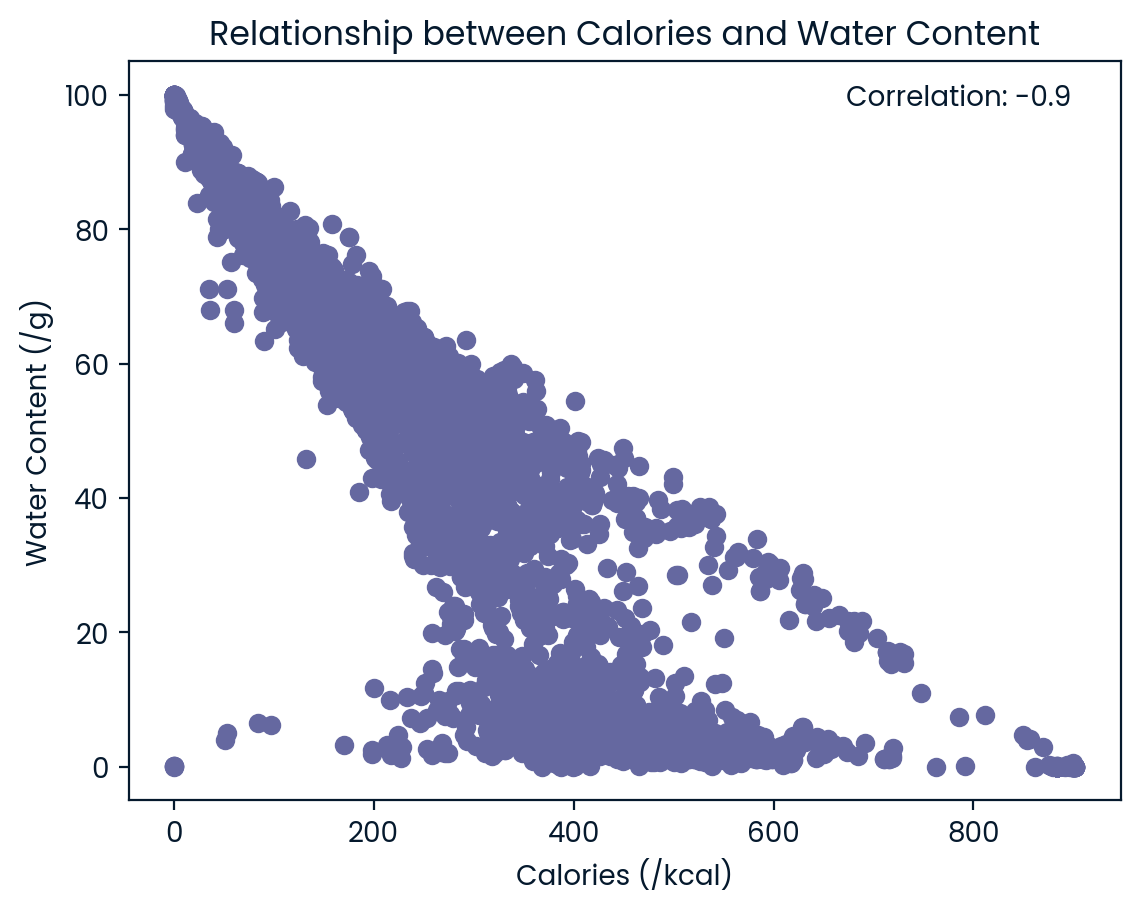

In [17]:
# Creat a scatterplot to show the relationship between calories and water content
# Generate scatterplot
plt.scatter(food["Calories (/kcal)"], food["Water (/g)"])
plt.xlabel("Calories (/kcal)")
plt.ylabel("Water Content (/g)")
plt.title("Relationship between Calories and Water Content")

# Calculate correlation coefficient
correlation = np.corrcoef(food["Calories (/kcal)"], food["Water (/g)"])[0, 1]
correlation = round(correlation, 2)

# Add correlation value to the plot
plt.text(0.95, 0.95, f"Correlation: {correlation}", ha='right', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

Calories are negatively coordinated with water content. The R value is -0.9 which means that they have a very strong negative relationship. When a food item has a high calorie count, it is associated with having low water content. When a food item has high water content, then it is associated with having low calories.

If we consume food with low calories, then we will be consuming high water content and vice versa.

### 🥝 Zero-Carb Diet and High-Protein Diet
What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

In [18]:
-- Calculate how many items have 0 grams of carbohydrates
SELECT COUNT(*)
FROM food
WHERE "Carbohydrate (/g)" = 0

,count_star()
0,2138


In [19]:
-- Calculate how many items have higher than average protein
SELECT COUNT(*)
FROM food
WHERE "Protein (/g)" > 
	(SELECT AVG("Protein (/g)")
	 FROM food)

,count_star()
0,3325


In [20]:
-- Calculate the average values of the nutritional categories in all the food items
SELECT AVG("Calories (/kcal)") AS Avg_Calories, AVG("Protein (/g)") AS Avg_Protein, AVG("Carbohydrate (/g)") AS Avg_Carb, AVG("Total fat (/g)") AS Avg_Fat, AVG("Cholesterol (/mg)") AS Avg_Cholesterol, AVG("Fiber (/g)") AS Avg_Fiber, AVG("Water (/g)") AS Avg_Water, AVG("Alcohol (/g)") AS Avg_Alcohol, AVG("Vitamin C (/mg)") AS Avg_VitaminC
FROM food

,Avg_Calories,Avg_Protein,Avg_Carb,Avg_Fat,Avg_Cholesterol,Avg_Fiber,Avg_Water,Avg_Alcohol,Avg_VitaminC
0,220.243118,11.926873,19.569788,10.687361,42.738997,1.836392,56.033466,0.127679,8.444604


In [21]:
-- Calculate the average values of the nutritional categories in food with zero carb
SELECT AVG("Calories (/kcal)") AS Avg_Calories, AVG("Protein (/g)") AS Avg_Protein, AVG("Carbohydrate (/g)") AS Avg_Carb, AVG("Total fat (/g)") AS Avg_Fat, AVG("Cholesterol (/mg)") AS Avg_Cholesterol, AVG("Fiber (/g)") AS Avg_Fiber, AVG("Water (/g)") AS Avg_Water, AVG("Alcohol (/g)") AS Avg_Alcohol, AVG("Vitamin C (/mg)") AS Avg_VitaminC
FROM food
WHERE "Carbohydrate (/g)" = 0

,Avg_Calories,Avg_Protein,Avg_Carb,Avg_Fat,Avg_Cholesterol,Avg_Fiber,Avg_Water,Avg_Alcohol,Avg_VitaminC
0,233.555012,22.289935,0.0,15.582214,93.45276,0.0,61.081712,0.105613,0.669411


In [22]:
-- Calculate the average values of the nutritional categories in food with high protein?
SELECT AVG("Calories (/kcal)") AS Avg_Calories, AVG("Protein (/g)") AS Avg_Protein, AVG("Carbohydrate (/g)") AS Avg_Carb, AVG("Total fat (/g)") AS Avg_Fat, AVG("Cholesterol (/mg)") AS Avg_Cholesterol, AVG("Fiber (/g)") AS Avg_Fiber, AVG("Water (/g)") AS Avg_Water, AVG("Alcohol (/g)") AS Avg_Alcohol, AVG("Vitamin C (/mg)") AS Avg_VitaminC
FROM food
WHERE "Protein (/g)" > 
	(SELECT AVG("Protein (/g)")
	 FROM food)

,Avg_Calories,Avg_Protein,Avg_Carb,Avg_Fat,Avg_Cholesterol,Avg_Fiber,Avg_Water,Avg_Alcohol,Avg_VitaminC
0,233.642291,22.697645,7.879338,12.384095,83.70406,1.283338,55.288,0.0,3.43188


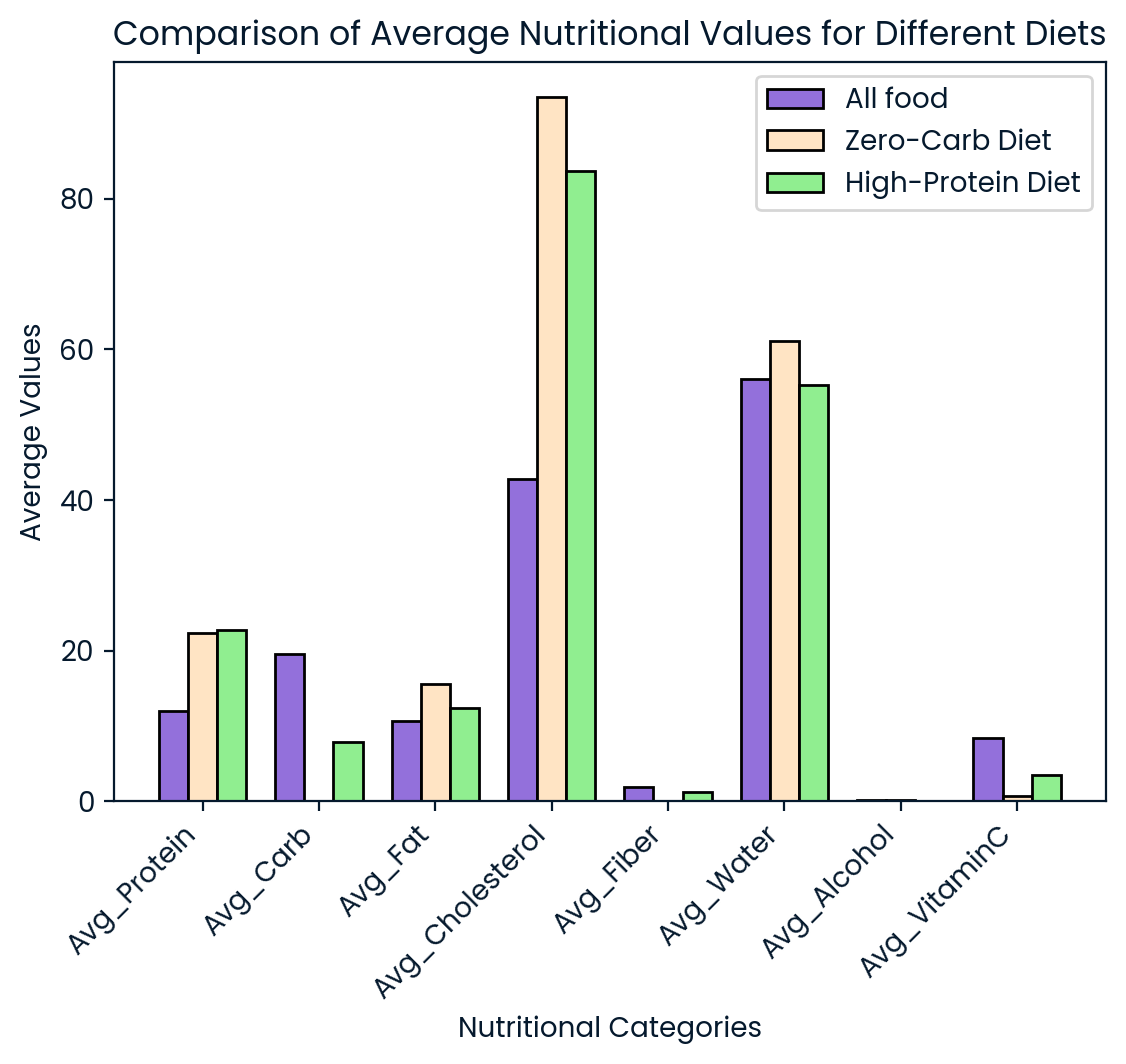

In [23]:
# Create a bar graph to compare the nutritional values of each diet
# Extract the category names and average values from avg_food, avg_carb, avg_protein (DataFrame created from the SQL queries ran above)
categories = avg_food.columns[1:]
avg_values_food = avg_food.iloc[0, 1:].values
avg_values_carb = avg_carb.iloc[0, 1:].values
avg_values_protein = avg_protein.iloc[0, 1:].values

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar graph
plt.bar(r1, avg_values_food, color='mediumpurple', width=bar_width, edgecolor='black', label='All food')
plt.bar(r2, avg_values_carb, color='bisque', width=bar_width, edgecolor='black', label='Zero-Carb Diet')
plt.bar(r3, avg_values_protein, color='lightgreen', width=bar_width, edgecolor='black', label='High-Protein Diet')

# Add labels and title
plt.xlabel('Nutritional Categories')
plt.ylabel('Average Values')
plt.title('Comparison of Average Nutritional Values for Different Diets')
plt.xticks([r + bar_width for r in range(len(categories))], categories, rotation=45, ha='right')  
plt.legend()

# Show the bar graph
plt.show()

In [24]:
--Count how many items are in each category
SELECT Category, COUNT(*) AS count
FROM food
GROUP BY Category
ORDER BY count DESC

,Category,count
0,Beef Products,954
1,Vegetables and Vegetable Products,814
2,Baked Products,517
3,"Lamb, Veal, and Game Products",464
4,Poultry Products,383
5,Beverages,366
6,Sweets,358
7,Fruits and Fruit Juices,355
8,Baby Foods,345
9,Pork Products,336


In [25]:
--Count how many items are in each category for items that has zero carbs
SELECT Category, COUNT(*) AS count
FROM food
WHERE "Carbohydrate (/g)" = 0
GROUP BY Category
ORDER BY count DESC

,Category,count
0,Beef Products,825
1,"Lamb, Veal, and Game Products",396
2,Poultry Products,249
3,Pork Products,209
4,Finfish and Shellfish Products,206
5,Fats and Oils,110
6,American Indian/Alaska Native Foods,75
7,Beverages,35
8,Sausages and Luncheon Meats,8
9,Fast Foods,6


In [26]:
--Count how many items are in each category for items that have higher than average protein levels
SELECT Category, COUNT(*) AS count
FROM food
WHERE "Protein (/g)" > 
	(SELECT AVG("Protein (/g)")
	 FROM food)
GROUP BY Category
ORDER BY count DESC

,Category,count
0,Beef Products,937
1,"Lamb, Veal, and Game Products",443
2,Poultry Products,375
3,Pork Products,317
4,Finfish and Shellfish Products,250
5,Fast Foods,170
6,Sausages and Luncheon Meats,133
7,Dairy and Egg Products,119
8,Legumes and Legume Products,105
9,Nut and Seed Products,85


First, being on either diet significantly reduces the number of food that is available to eat. While the data contains 7793 different items, only 27% (2138) of the items can be considered zero-carb and only 43% (3325) of the items can be considered high-protein. This means that those with a budget or those who live in a food desert may have trouble finding suitable items.

Second, being on those diets also affect the intake of other nutritional values. On the positive side, zero-carb food items also have, on average, higher protein levels and high-protein food items have, on average, lower carbohydrates. 

On the reverse, we see that both of these diets have _very high average cholesetrol levels_ compared to the average cholesterol levels of all food. They also have _high average fat levels_ than that of all food. In addition, these diets have _lower average fiber levels and average Vitamin C levels_ than those of all foods.

Finally, being on these diets will exclude certain food categories or vastly reduce the number of possible items in those categories. For example, "Vegetables and Vegetable Products" contained the second most number of items in all food but does not appear at all in items that contain no carbs and only contained 17 items that fit in the high-protein diet. This may mean that other nutritional values outside of those that's collected here may be missing when adhering strictly with the diets. Also, it may be unsustainable for people enjoy eating those foods and those who have speical diet needs because of their religions, medical conditions, etc. 

Of course, these conclusions come from eating a diet only consists of those food items that meet either the zero-carb or high-protein criteria. People who are on these diets may want supplement with other items and supplements in order to have a more well-rounded diet.

### 🥕 Fat, Protein, and Carbohydrate's Kilocalories
According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

In [27]:
# Calculate the coefficients of the linear regression
# Import the necessary function
from sklearn.linear_model import LinearRegression

# Define the independent variables
x = food[['Total fat (/g)', 'Protein (/g)', 'Carbohydrate (/g)']]

# Define the target variable
y = food['Calories (/kcal)']

# Create an instance of the LinearRegression model
model = LinearRegression().fit(x,y)

# Display the coefficients for each variable
model.coef_

array([8.80413501, 4.00204437, 3.79862627])

In [28]:
# Display the intercept
model.intercept_

4.079962044694639

In [29]:
# Import the necessary function
from sklearn.metrics import r2_score

# Predict the target variable using the model
y_pred = model.predict(x)

# Calculate the R-squared score
r2_score = r2_score(y, y_pred)

# Display the r2 score
r2_score

0.9897535862208672

In [30]:
# Calculate the errors
# Import the necessary function
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the MAE, MSE, RMSE
mae, mse, rmse

(7.569804496327644, 291.7522292268119, 17.080756108170736)

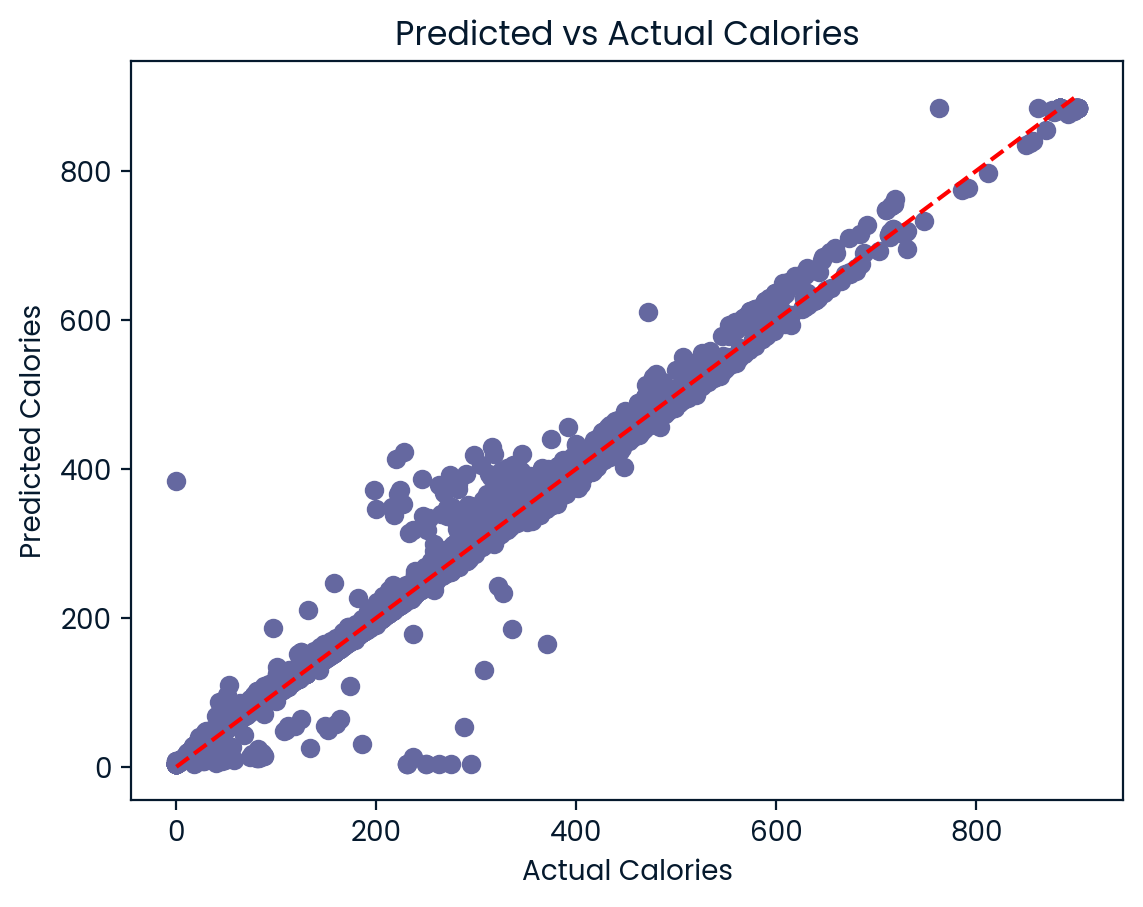

In [31]:
# Plot the model
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')
plt.title('Predicted vs Actual Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()

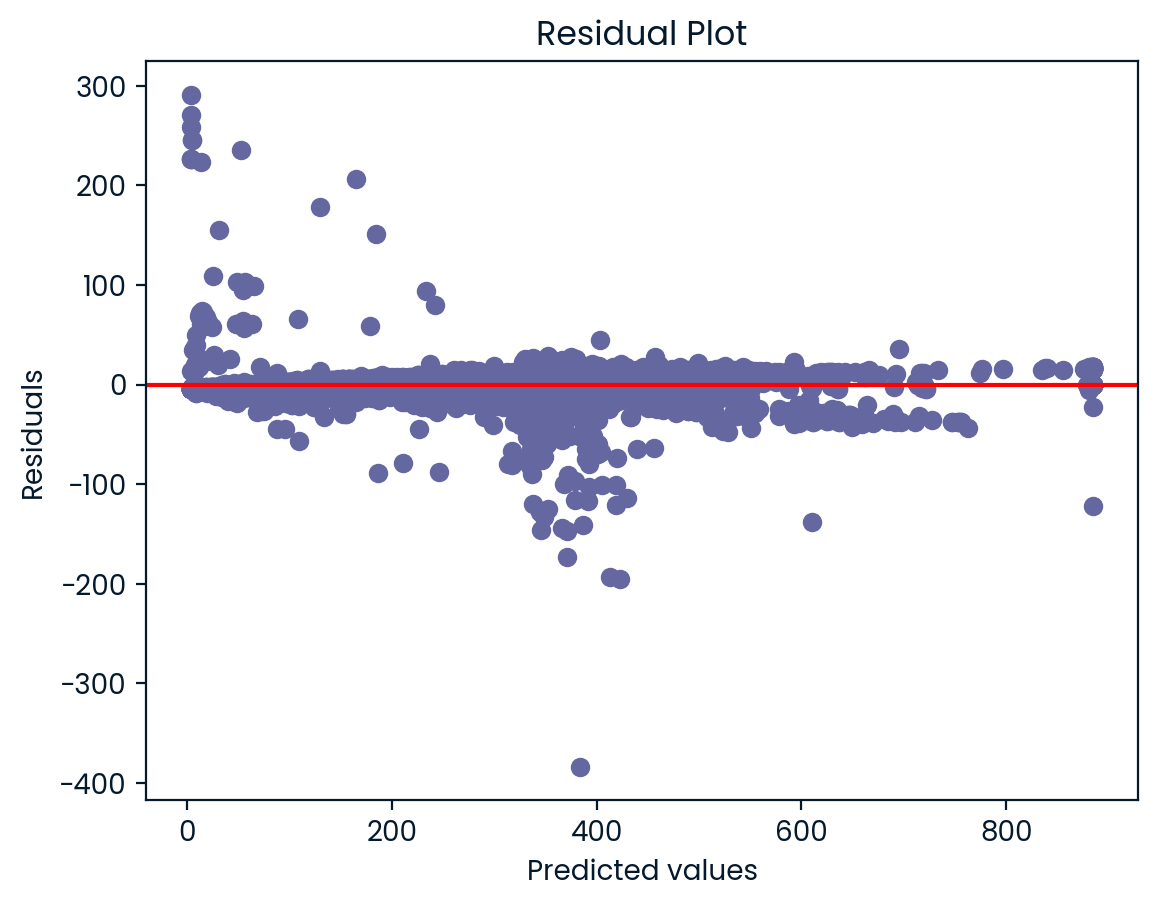

In [32]:
# Plot the residuals for the regression
# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

After we fit the data to a linear regression, we can see that our final equation came out to be y= 4.08+ 8.80f +4.00p +3.80c with f being total fat, p being protein, and c being carbohydrates. This does round to be the same as our estimate of fat having 9 kilocalories and protein and carbohydrates having 4 kilocalories each. 

Our r2 is 0.99 which means our model with these three nutritional categories can be used to accurately predict the calories of most food items. 

The Mean Absolute Error (MAE) is 7.59, the Mean Squared Error (MSE) is 291.75, and the Root Mean Squared Error (RMSE) is 17.08. With the MAE being 7.59, that means that the predicted value is usually only 7.59 calories away from the actual value and that's pretty good in this context. The RMSE is 17.09 which is still fairly close to the MAE but it is higher. Since the MSE penalizes larger errors, we can conclude that there are some outliers that is impacting the prediction. Indeed, we can see there's some outliers on the graph for the regression and for the residuals. 

In [33]:
# Calculate the coefficients of the linear regression with all nutritional categories
# Define the independent variables
x = food[['Total fat (/g)', 'Protein (/g)', 'Carbohydrate (/g)', 'Cholesterol (/mg)', 'Fiber (/g)', 'Water (/g)', 'Alcohol (/g)', 'Vitamin C (/mg)']]

# Define the target variable
y = food['Calories (/kcal)']

# Create an instance of the LinearRegression model
model = LinearRegression().fit(x,y)

# Display the coefficients for each variable
model.coef_

array([ 9.05028271e+00,  4.34651763e+00,  4.18103540e+00,  5.63009593e-03,
       -1.66584211e+00,  2.12557302e-01,  7.05470045e+00, -2.51921498e-02])

In [34]:
# Calculate the coefficients of the regression with cholesterol, water, and alcohol
# Define the independent variables
x = food[['Total fat (/g)', 'Protein (/g)', 'Carbohydrate (/g)','Cholesterol (/mg)','Water (/g)', 'Alcohol (/g)']]

# Define the target variable
y = food['Calories (/kcal)']

# Create an instance of the LinearRegression model
model = LinearRegression().fit(x,y)

# Display the coefficients for each variable
model.coef_

array([9.27642689, 4.54221012, 4.29026169, 0.00932439, 0.44129992,
       7.33859518])

In [35]:
# Calculate the coefficients of the regression with alcohol
# Define the independent variables
x1 = food[['Total fat (/g)', 'Protein (/g)', 'Carbohydrate (/g)','Alcohol (/g)']]

# Define the target variable
y1 = food['Calories (/kcal)']

# Create an instance of the LinearRegression model
model = LinearRegression().fit(x1,y1)

# Display the coefficients for each variable
model.coef_

array([8.8379392 , 4.11108749, 3.83092816, 6.90701776])

In [36]:
# Calculate the r2 score for the regression with alcohol
# Import the necessary function
from sklearn.metrics import r2_score

# Predict the target variable using the model
y_pred1 = model.predict(x1)

# Calculate the R-squared score
r2_score1 = r2_score(y1, y_pred1)

# Display the r2 score
print(r2_score1)

0.9942181461381681


In [37]:
# Calculate the errors
# Import the necessary function
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y1, y_pred1)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y1, y_pred1)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the MAE, MSE, RMSE
mae, mse, rmse

(6.285335069162878, 164.63016130467702, 12.830828550981305)

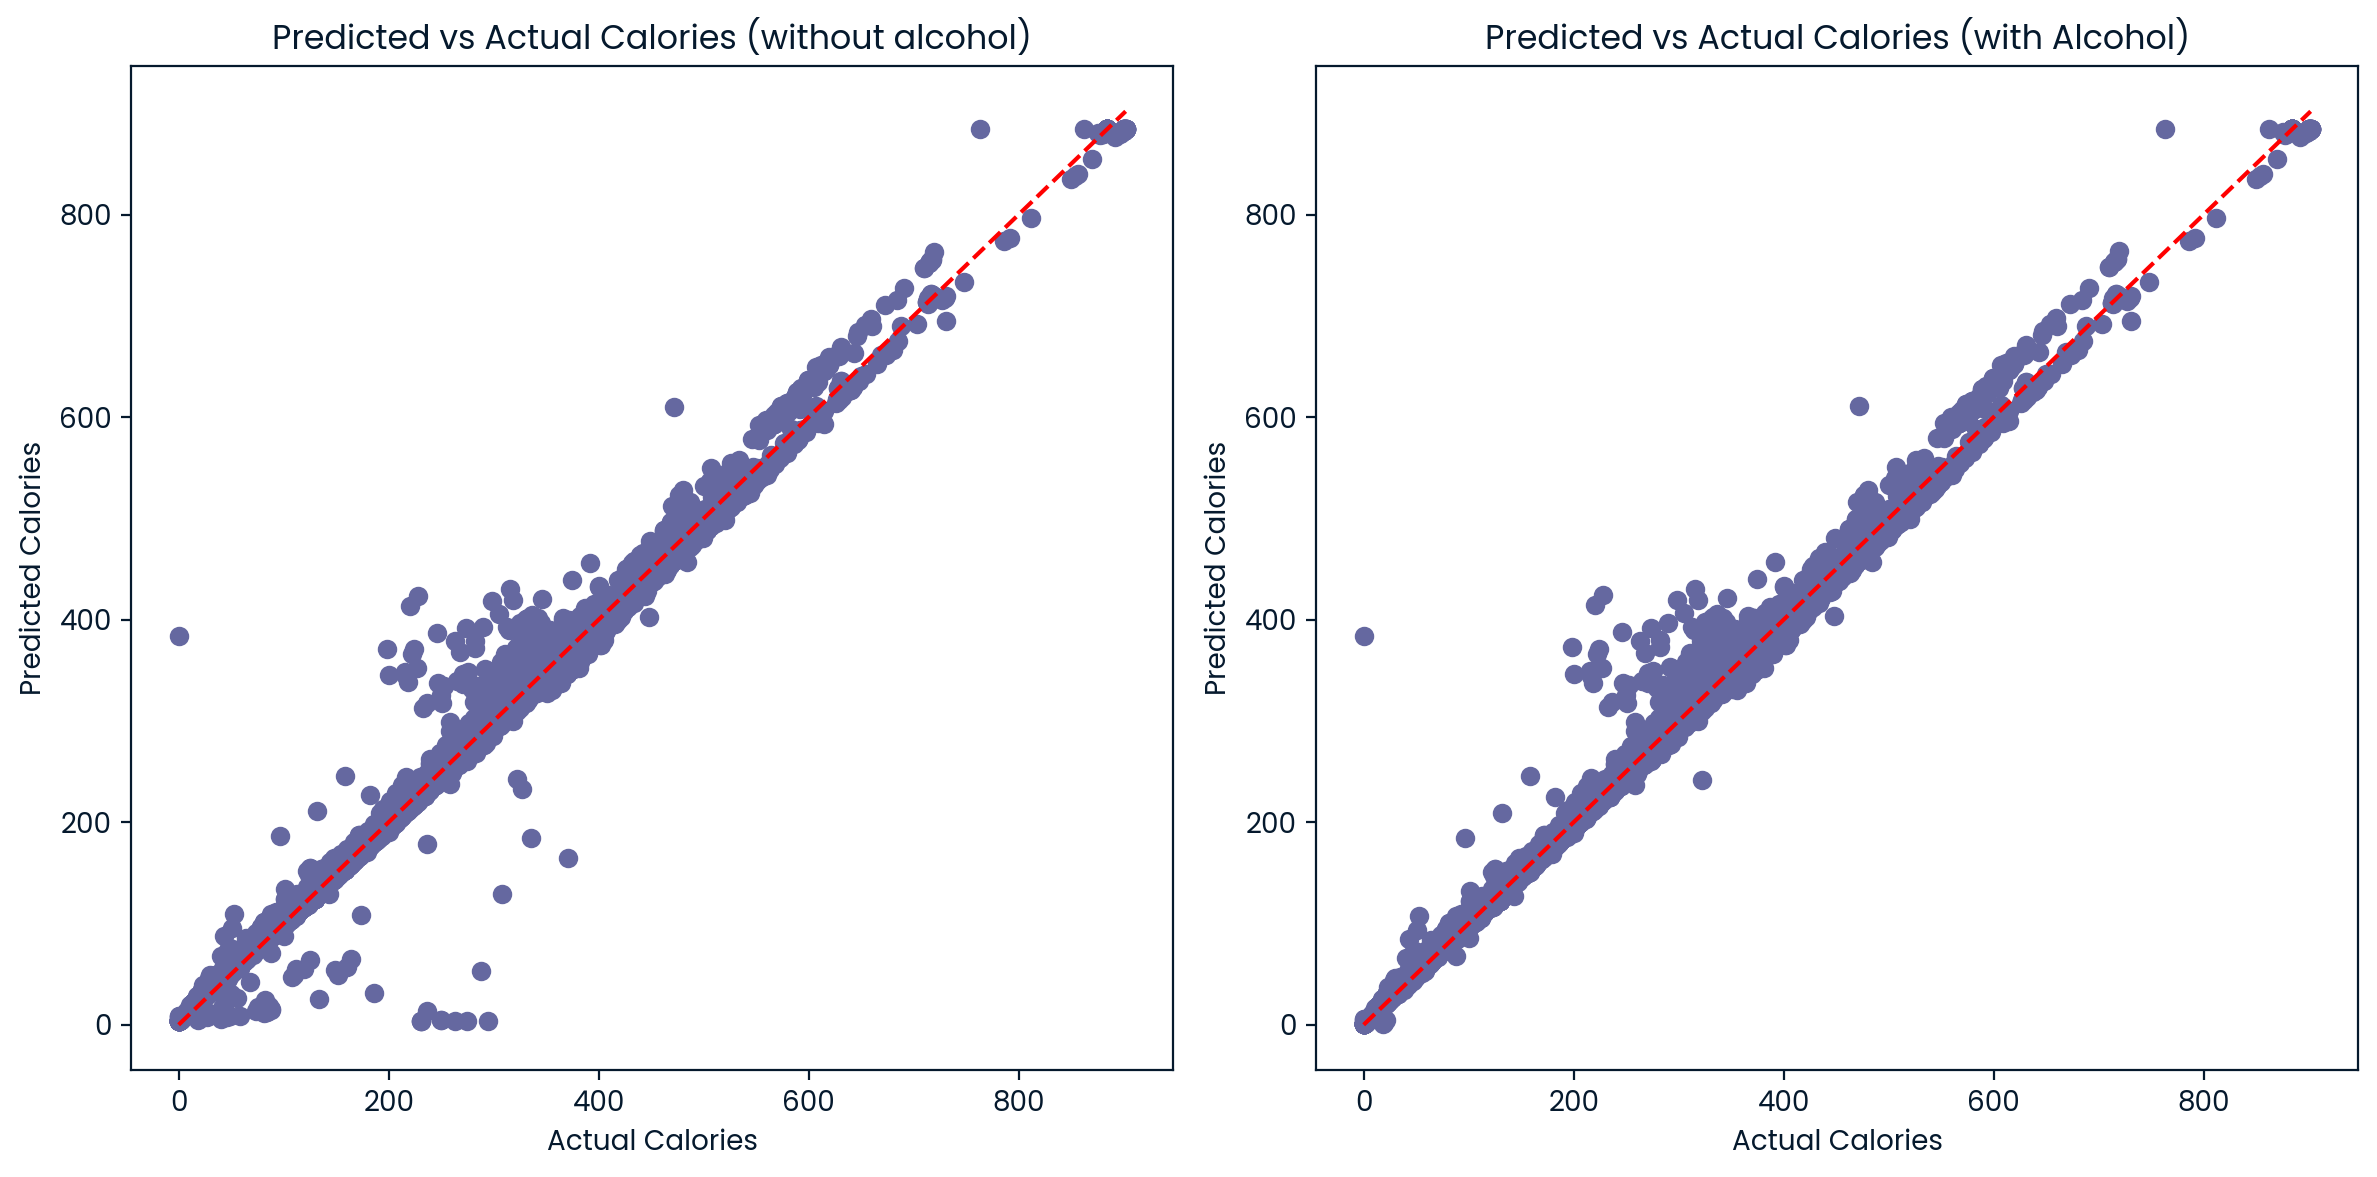

In [38]:
# Plot the regression without alcohol and with alcohol
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph
ax1.scatter(y, y_pred)
ax1.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')
ax1.set_title('Predicted vs Actual Calories (without alcohol)')
ax1.set_xlabel('Actual Calories')
ax1.set_ylabel('Predicted Calories')

# Plot the second graph
ax2.scatter(y1, y_pred1)
ax2.plot([min(y1), max(y1)], [min(y1), max(y1)], linestyle='--', color='red')
ax2.set_title('Predicted vs Actual Calories (with Alcohol)')
ax2.set_xlabel('Actual Calories')
ax2.set_ylabel('Predicted Calories')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

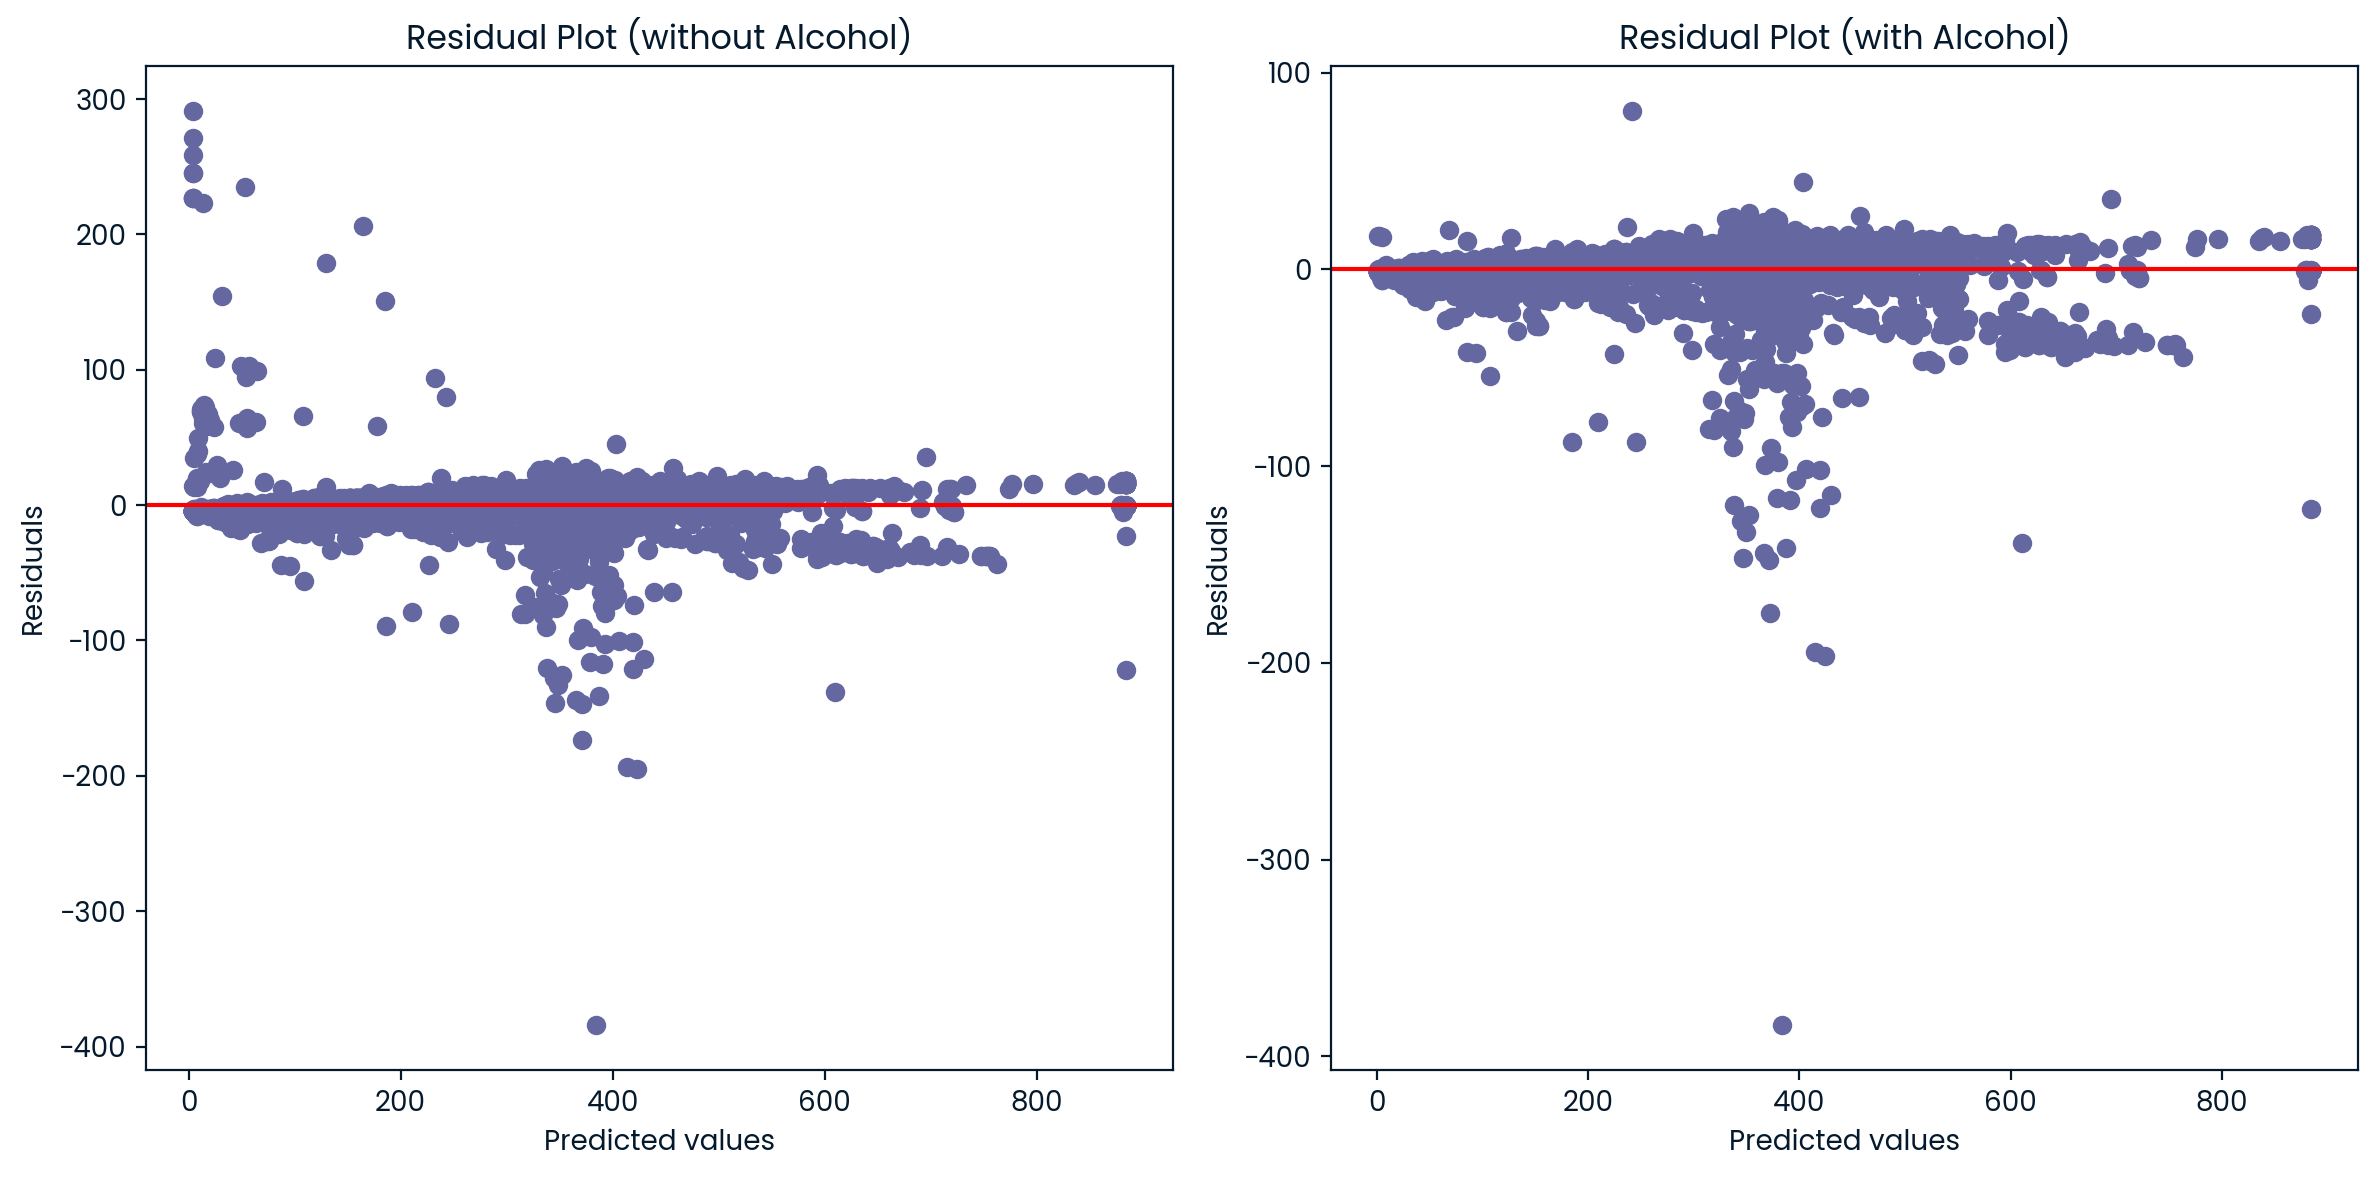

In [39]:
# Plot the residuals for the regression without alcohol and with alcohol
# Calculate the residuals
residuals = y - y_pred
residuals1 = y1 - y_pred1

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the residuals without alcohol
ax1.scatter(y_pred, residuals)
ax1.axhline(y=0, color='r', linestyle='-')
ax1.set_title('Residual Plot (without Alcohol)')  
ax1.set_xlabel('Predicted values')  
ax1.set_ylabel('Residuals') 

# Plot the residuals with alcohol
ax2.scatter(y_pred1, residuals1)
ax2.axhline(y=0, color='r', linestyle='-')
ax2.set_title('Residual Plot (with Alcohol)') 
ax2.set_xlabel('Predicted values')  
ax2.set_ylabel('Residuals')  

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()  

In the initial regression analysis with all of the nutritional categories, the ones that stand out are cholesterol, water, and alcohol because they have positive coefficients. When we built a regression excluding fiber and vitamin C, cholesterol and water's coefficients dropped to closer to 0 whereas alcohol's coefficient remained at around 7. Alcohol is a hidden factor that contributes about 7 kilocalories per 1 gram.

When analyzing the regression with just fat, protein, carbohydrate, and alcohol, we can see that the r2 (0.994) score improved slightly compared to that (0.990) of the original regression containing fat, protein, and carbohydrate. The MAE (6.29), MSE (164.63), and RMSE (12.83) also reduced when including alcohol meaning that our predicted values are closer to the actual values and that there's less large outliers affecting the prediction. When comparing the graph, many of the data points far from the regression line also seem to cluster around the regression. We also see less outliers that are far from horizontal axis the in the residual graph.

According to the [NHS]([url](https://www.nhs.uk/live-well/alcohol-advice/calories-in-alcohol/)), one gram of alcohol contains about 7 calories which matches up with the analysis.

## 🥦 Conclusion

We've throughly analysed the different aspects of the nutrition data. We can draw several conclusions and make recommendations for people looking to change their diets.

For those people who are deficient in Vitamin C and want to increase their intake through food, they should consider adding more fruits and vegetables to their diet. Fruits like acerola, Chinese jujube, and guava contain high amount of Vitamin C and can boost their Vitamin C level. They can also consider Gerber's organic baby food (if they like the taste), drink powders, and sweet, freeze-dried peppers for variety. 

If someone wants to consume food with lower calories, then they can consider food with high water content as those are correlated to food that has lower calories. If someone is concerned about water content in their food, they can try food with higher calories. 

When considering different diets, one should also consider if the diet will be well-balanced to maintain a healthy lifestyle. While diets like zero-carb diets or high-protein diets may help people achieve their weight goals in the short-term, it may be not sustainable long-term due to lack of essential nutrients and food groups. There may also be additional difficulty in obtaining appropariate food for the diet while keeping under budget so that should be considered before starting the diet.

Lastly, fat, protein, carbohhydrates, and alcohol all contribute to calories. If someone needs to eat more or less calories, they should be aware of these nutritional compositions so that they can pick balanced food that works towards their goals. Because alcohol contributes about 7 calories per 1 gram, if someone needs to control their caloric intake, it may be a good idea to cut down alcohol consumption.